<a href="https://colab.research.google.com/github/MuskanJam/BharatIntern/blob/main/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

In [5]:
# Fetch historical stock price data for TSLA
ticker = 'TSLA'
data = yf.download(ticker, start='2020-01-01', end='2022-01-01')

[*********************100%%**********************]  1 of 1 completed


In [7]:
# Extract the 'Close' prices
data = data[['Close']]

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Convert the data into sequences
sequence_length = 10
sequences = []
for i in range(len(data) - sequence_length):
    sequences.append(data['Close'][i:i+sequence_length+1])

sequences = np.array(sequences)

<ipython-input-7-4d42bb8964c1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))


In [8]:
split_ratio = 0.8
split_index = int(len(sequences) * split_ratio)

train_data = sequences[:split_index]
test_data = sequences[split_index:]

In [10]:
X_train, y_train = train_data[:, :-1], train_data[:, -1]
X_test, y_test = test_data[:, :-1], test_data[:, -1]

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [11]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
13/13 [==============================] - 5s 14ms/step - loss: 0.0480
Epoch 2/10
13/13 [==============================] - 0s 13ms/step - loss: 0.0091
Epoch 3/10
13/13 [==============================] - 0s 12ms/step - loss: 0.0037
Epoch 4/10
13/13 [==============================] - 0s 12ms/step - loss: 0.0018
Epoch 5/10
13/13 [==============================] - 0s 12ms/step - loss: 0.0012
Epoch 6/10
13/13 [==============================] - 0s 13ms/step - loss: 0.0012
Epoch 7/10
13/13 [==============================] - 0s 14ms/step - loss: 0.0011
Epoch 8/10
13/13 [==============================] - 0s 13ms/step - loss: 0.0011
Epoch 9/10
13/13 [==============================] - 0s 12ms/step - loss: 0.0011
Epoch 10/10
13/13 [==============================] - 0s 12ms/step - loss: 0.0012


In [13]:
test_loss = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)

4/4 [==============================] - 2s 8ms/step - loss: 0.0049
Test Loss: 0.004860748071223497


In [14]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

4/4 [==============================] - 1s 5ms/step


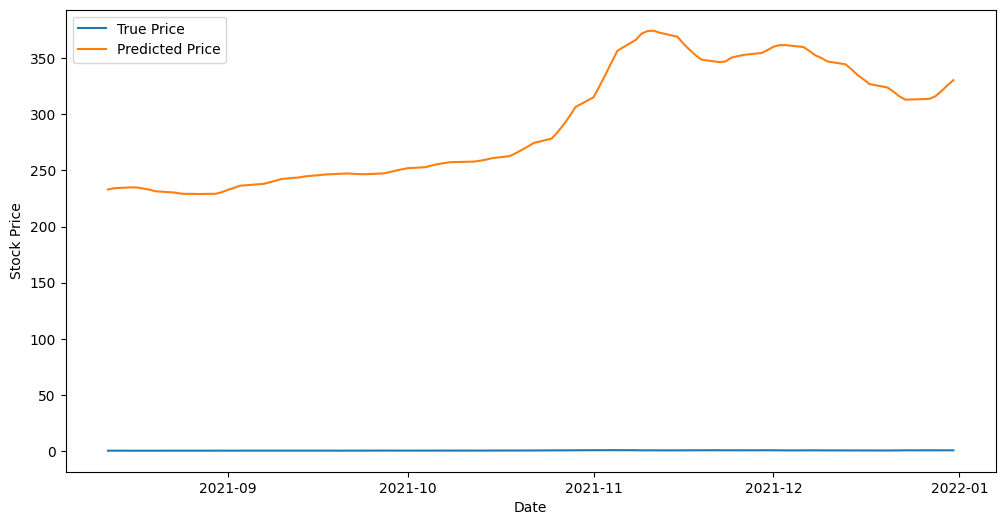

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(data.index[split_index+sequence_length:], data['Close'][split_index+sequence_length:], label='True Price')
plt.plot(data.index[split_index+sequence_length:], predictions, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()